<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-11-01 17:10:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22,56K  --.-KB/s    in 0,1s    

2021-11-01 17:10:46 (214 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
print(df.shape)
df.head()

(346, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


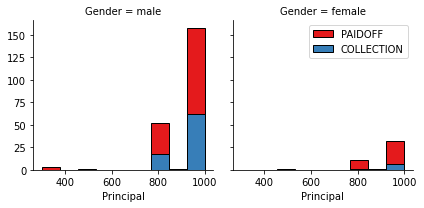

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

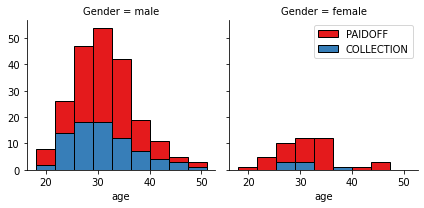

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


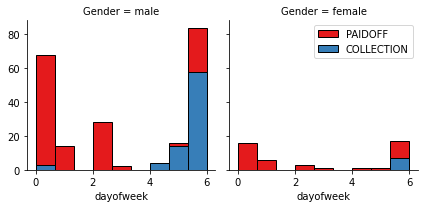

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [13]:
# df.groupby(['education'])['loan_status'].value_counts(normalize=False)
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame


In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [16]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [17]:
X = Feature
print(X.shape)
X[0:5]

(346, 8)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Let's convert them to 0 (COLLECTION) and 1 (PAIDOFF):

In [19]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1], inplace=True)
y = df['loan_status'].values
print(y.shape)
y

(346,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X.shape)
X[0:5]

(346, 8)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)
# print(X_train)
# print(X_test)
print(y_train)
print(y_test)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
[1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1]
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]


# K Nearest Neighbor (KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


### Calculate the accuracy of KNN for different values of k (the number of nearest neighbors to examine).

In [23]:
ks = 10
accs_knn = np.zeros((ks-1))
stds_knn = np.zeros((ks-1))
yhat_knn = []
clf_knn = []

for k in range(1, ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    clf_knn.append(neigh)
    yhat_knn.append(neigh.predict(X_test))
    accs_knn[k-1] = metrics.accuracy_score(y_test, yhat_knn[-1])
    stds_knn[k-1] = np.std(yhat_knn[-1]==y_test)/np.sqrt(yhat_knn[-1].shape[0])

yhat_knn = np.array(yhat_knn)
print(yhat_knn.shape)
print(yhat_knn)
print(accs_knn)
print(stds_knn)
print(clf_knn)

(9, 70)
[[1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1]
 [0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1]
 [1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0]
 [1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1]
 [1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 

### Plot the model accuracy for a different number of neighbors.

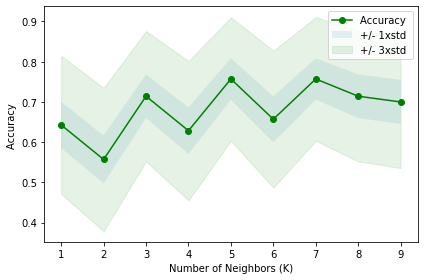

Best accuracy reached using KNN classifier: 0.7571428571428571 was obtained with k = 5


In [24]:
plt.plot(range(1, ks), accs_knn, 'go-')
plt.fill_between(range(1, ks), accs_knn - 1 * stds_knn, accs_knn + 1 * stds_knn, alpha=0.10)
plt.fill_between(range(1, ks), accs_knn - 3 * stds_knn, accs_knn + 3 * stds_knn, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print(f"Best accuracy reached using KNN classifier: {accs_knn.max()} was obtained with k = {accs_knn.argmax()+1}") 

# Decision Tree


In [25]:
depths = 16
accs_tree = np.zeros((depths-1))
stds_tree = np.zeros((depths-1))
yhat_tree = []
clf_tree = []

for depth in range(1, depths):
    
    #Train Model and Predict  
#     print(depth)    
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=depth) # criterion="entropy" so we can see the information gain of each node.
    tree.fit(X_train, y_train)
    clf_tree.append(tree)
    yhat_tree.append(tree.predict(X_test))
    accs_tree[depth-1] = metrics.accuracy_score(y_test, yhat_tree[-1])
    stds_tree[depth-1] = np.std(yhat_tree[-1]==y_test)/np.sqrt(yhat_tree[-1].shape[0])

yhat_tree = np.array(yhat_tree)
print(yhat_tree.shape)
print(yhat_tree)
print(accs_tree)
print(stds_tree)
print(clf_tree)

(15, 70)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 0 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]]
[0.82857143 0.82857143 0.8        0.7        0.64285714 0.67142857
 0.71428571 0.71428571 0.74285714 0.75714286 0.68571429 0.7
 0.68571429 0.7        0.7       ]
[0.04504614 0.04504614 0.04780914 0.05477226 0.05727027 0.05613914
 0.05399492 0.05399492 0.05223852 0.05125253 0.05548619 0.05477226
 0.05548619 0.05477226 0.05477226]
[DecisionTreeClassifier(criterion='entropy', max_depth=1), DecisionTreeClassifier(criterion='entropy', max_depth=2), DecisionTreeClassifier(criterion='entropy', max_depth=3), DecisionTreeClassifier(criterion='entropy', max_depth=4), DecisionTreeClassifier(criterion='entropy', max_depth=5), DecisionTreeClassifier(criterion='entropy', max_depth=6), DecisionTreeClassifier(criterion='entropy', max_depth=7), DecisionTreeClassifier(criterion='entropy', max_depth=8), DecisionTreeClassifier(criterion='entropy', max_depth=9), DecisionTreeClass

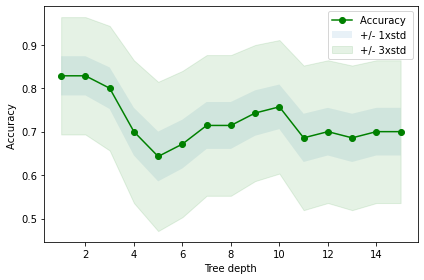

Best accuracy reached using Decision Tree classifier: 0.8285714285714286 was obtained with depth = 1


In [26]:
plt.plot(range(1, depths), accs_tree, 'go-')
plt.fill_between(range(1, depths), accs_tree - 1 * stds_tree, accs_tree + 1 * stds_tree, alpha=0.10)
plt.fill_between(range(1, depths), accs_tree - 3 * stds_tree, accs_tree + 3 * stds_tree, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Tree depth')
plt.tight_layout()
plt.show()

print(f"Best accuracy reached using Decision Tree classifier: {accs_tree.max()} was obtained with depth = {accs_tree.argmax()+1}") 

### Visualize best tree

In [27]:
# # # Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [28]:
# from  io import StringIO
# import pydotplus
# import matplotlib.image as mpimg
# from sklearn import tree
# %matplotlib inline 

In [29]:
# tree_ = DecisionTreeClassifier(criterion="entropy", max_depth=accs_tree.argmax()+1)
# tree_.fit(X_train, y_train)

# dot_data = StringIO()
# filename = "loantree.png"
# featureNames = Feature.columns
# out = tree.export_graphviz(tree_, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(50, 50))
# plt.imshow(img, interpolation='nearest')

# Support Vector Machine


In [30]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accs_svm = np.zeros((len(kernels)))
stds_svm = np.zeros((len(kernels)))
yhat_svm = []
clf_svm = []

for i, kernel in enumerate(kernels):
    
    #Train Model and Predict  
    clf = svm.SVC(kernel=kernel, probability=True)
    clf.fit(X_train, y_train) 
    clf_svm.append(clf)
    
    yhat_svm.append(clf.predict(X_test))
    accs_svm[i] = metrics.accuracy_score(y_test, yhat_svm[-1])
    stds_svm[i] = np.std(yhat_svm[-1]==y_test)/np.sqrt(yhat_svm[-1].shape[0])

yhat_svm = np.array(yhat_svm)
print(yhat_svm.shape)
print(yhat_svm)
print(accs_svm)
print(stds_svm)
print(clf_svm)

(4, 70)
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[0.82857143 0.8        0.8        0.8       ]
[0.04504614 0.04780914 0.04780914 0.04780914]
[SVC(kernel='linear', probability=True), SVC(kernel='poly', probability=True), SVC(probability=True), SVC(kernel='sigmoid', probability=True)]


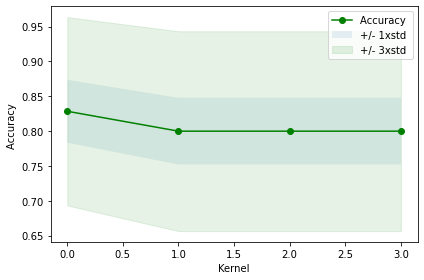

Best accuracy reached using Support Vector Machine classifier: 0.8285714285714286 was obtained with kernel = linear


In [31]:
plt.plot(range(0, len(kernels)), accs_svm, 'go-')
plt.fill_between(range(0, len(kernels)), accs_svm - 1 * stds_svm, accs_svm + 1 * stds_svm, alpha=0.10)
plt.fill_between(range(0, len(kernels)), accs_svm - 3 * stds_svm, accs_svm + 3 * stds_svm, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Kernel')
plt.tight_layout()
plt.show()

print(f"Best accuracy reached using Support Vector Machine classifier: {accs_svm.max()} was obtained with kernel = {kernels[accs_svm.argmax()]}") 

# Logistic Regression


In [32]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
accs_lr = np.zeros((len(solvers)))
stds_lr = np.zeros((len(solvers)))
yhat_lr = []
clf_lr = []

for i, solver in enumerate(solvers):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=0.01, solver=solver).fit(X_train, y_train)
    clf_lr.append(LR)
    yhat_lr.append(LR.predict(X_test))
    accs_lr[i] = metrics.accuracy_score(y_test, yhat_lr[-1])
    stds_lr[i] = np.std(yhat_lr[-1]==y_test)/np.sqrt(yhat_lr[-1].shape[0])
    
yhat_lr = np.array(yhat_lr)
print(yhat_lr.shape)
print(yhat_lr)
print(accs_lr)
print(stds_lr)
print(clf_lr)

(5, 70)
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[0.82857143 0.82857143 0.81428571 0.82857143 0.82857143]
[0.04504614 0.04504614 0.04647956 0.04504614 0.04504614]
[LogisticRegression(C=0.01, solver='newton-cg'), LogisticRegression(C=0.01), LogisticRegression(C=0.01, solver='liblinear'), LogisticRegression(C=0.01, 

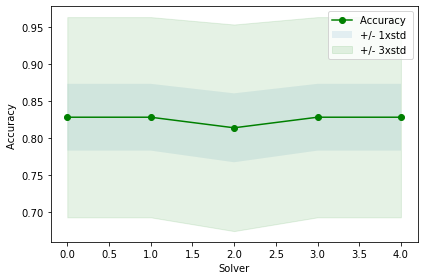

Best accuracy reached using Logistic Regression classifier: 0.8285714285714286 was obtained with solver = newton-cg


In [33]:
plt.plot(range(0, len(solvers)), accs_lr, 'go-')
plt.fill_between(range(0, len(solvers)), accs_lr - 1 * stds_lr, accs_lr + 1 * stds_lr, alpha=0.10)
plt.fill_between(range(0, len(solvers)), accs_lr - 3 * stds_lr, accs_lr + 3 * stds_lr, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Solver')
plt.tight_layout()
plt.show()

print(f"Best accuracy reached using Logistic Regression classifier: {accs_lr.max()} was obtained with solver = {solvers[accs_lr.argmax()]}") 

# Model Evaluation using Test set


In [34]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-11-01 17:12:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3,6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3,56K  --.-KB/s    in 0s      

2021-11-01 17:12:03 (665 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [36]:
test_df = pd.read_csv('loan_test.csv')
print(test_df.shape)
test_df.head()

(54, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Data exploration and pre-processing: in order to obtain same features as done before for Training set

In [37]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [38]:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [39]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=False)

education             loan_status
Bechalor              PAIDOFF         8
High School or Below  PAIDOFF        11
                      COLLECTION     10
Master or Above       PAIDOFF         2
college               PAIDOFF        19
                      COLLECTION      4
Name: loan_status, dtype: int64

In [40]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
print(test_df.shape)
test_df.head()

(54, 12)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [41]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1, inplace=True)
test_Feature.head()
X_test_ = test_Feature
X_test_[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [42]:
Feature[:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [43]:
X_test_ = preprocessing.StandardScaler().fit(X_test_).transform(X_test_)
print(X_test_.shape)
print(X_test_[0:5])

(54, 8)
[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]


In [44]:
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1], inplace=True)
y_test_ = test_df['loan_status'].values
print(y_test_.shape)
y_test_

(54,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluate best classifiers on Test set

In [45]:
yhat_knn_ = clf_knn[accs_knn.argmax()].predict(X_test_)
# yhat_tree_ = clf_tree[accs_tree.argmax()].predict(X_test_)
yhat_tree_ = clf_tree[2].predict(X_test_) # for the decision tree classifier, we can select a model with depth > 1 and high accuracy
yhat_svm_ = clf_svm[accs_svm.argmax()].predict(X_test_)
yhat_lr_ = clf_lr[accs_lr.argmax()].predict(X_test_)

In [46]:
print(yhat_knn_)
print(yhat_tree_)
print(yhat_svm_)
print(yhat_lr_)

[1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1]
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
yhat_prob_knn_ = clf_knn[accs_knn.argmax()].predict_proba(X_test_)
yhat_prob_tree_ = clf_tree[accs_tree.argmax()].predict_proba(X_test_)
yhat_prob_svm_ = clf_svm[accs_svm.argmax()].predict_proba(X_test_)
yhat_prob_lr_ = clf_lr[accs_lr.argmax()].predict_proba(X_test_)

In [48]:
print(yhat_prob_knn_.shape)
print(yhat_prob_knn_[:5])
print(yhat_prob_tree_.shape)
print(yhat_prob_tree_[:5])
print(yhat_prob_svm_.shape)
print(yhat_prob_svm_[:5])
print(yhat_prob_lr_.shape)
print(yhat_prob_lr_[:5])

(54, 2)
[[0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]]
(54, 2)
[[0.01818182 0.98181818]
 [0.43373494 0.56626506]
 [0.43373494 0.56626506]
 [0.43373494 0.56626506]
 [0.43373494 0.56626506]]
(54, 2)
[[0.25447673 0.74552327]
 [0.25474585 0.74525415]
 [0.25472667 0.74527333]
 [0.25475281 0.74524719]
 [0.25476066 0.74523934]]
(54, 2)
[[0.13767512 0.86232488]
 [0.27209596 0.72790404]
 [0.2844486  0.7155514 ]
 [0.35014297 0.64985703]
 [0.30172256 0.69827744]]


#### Jaccard index

In [49]:
# pos_label = 1 --> paidoff loan 
jaccard_score_knn = jaccard_score(y_test_, yhat_knn_, pos_label=1)
jaccard_score_tree = jaccard_score(y_test_, yhat_tree_, pos_label=1)
jaccard_score_svm = jaccard_score(y_test_, yhat_svm_, pos_label=1)
jaccard_score_lr = jaccard_score(y_test_, yhat_lr_, pos_label=1)
#
print(f"Jaccard scores: knn = {jaccard_score_knn}, decision tree = {jaccard_score_tree}, svm = {jaccard_score_svm}, logistic regression = {jaccard_score_lr}")

Jaccard scores: knn = 0.6938775510204082, decision tree = 0.7450980392156863, svm = 0.7407407407407407, logistic regression = 0.7407407407407407


#### F1-score

In [50]:
f1_score_1_knn = f1_score(y_test_, yhat_knn_, average='binary')
f1_score_1_tree = f1_score(y_test_, yhat_tree_, average='binary')
f1_score_1_svm = f1_score(y_test_, yhat_svm_, average='binary')
f1_score_1_lr = f1_score(y_test_, yhat_lr_, average='binary')
#
print(f"f1-scores (positive class): knn = {f1_score_1_knn}, decision tree = {f1_score_1_tree}, svm = {f1_score_1_svm}, logistic regression = {f1_score_1_lr}")

f1-scores (positive class): knn = 0.8192771084337349, decision tree = 0.8539325842696629, svm = 0.851063829787234, logistic regression = 0.851063829787234


In [51]:
f1_score_2_knn = f1_score(y_test_, yhat_knn_, average='weighted')
f1_score_2_tree = f1_score(y_test_, yhat_tree_, average='weighted')
f1_score_2_svm = f1_score(y_test_, yhat_svm_, average='weighted')
f1_score_2_lr = f1_score(y_test_, yhat_lr_, average='weighted')
#
print(f"f1-scores (averaged): knn = {f1_score_2_knn}, decision tree = {f1_score_2_tree}, svm = {f1_score_2_svm}, logistic regression = {f1_score_2_lr}")

f1-scores (averaged): knn = 0.7105756358768406, decision tree = 0.7144140000438048, svm = 0.6304176516942475, logistic regression = 0.6304176516942475


#### LogLoss

In [52]:
log_loss_knn = log_loss(y_test_, yhat_prob_knn_)
log_loss_tree = log_loss(y_test_, yhat_prob_tree_)
log_loss_svm = log_loss(y_test_, yhat_prob_svm_)
log_loss_lr = log_loss(y_test_, yhat_prob_lr_)
#
print(f"LogLosses: knn = {log_loss_knn}, decision tree = {log_loss_tree}, svm = {log_loss_svm}, logistic regression = {log_loss_lr}")

LogLosses: knn = 1.0668185954901075, decision tree = 0.5029204009105902, svm = 0.572227998996325, logistic regression = 0.5147474238140891


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.694   | 0.710    | 1.067   |
| Decision Tree      | 0.745   | 0.714    | 0.503   |
| SVM                | 0.741   | 0.630    | 0.572   |
| LogisticRegression | 0.741   | 0.630    | 0.515   |
